# Integración de ecuaciones hidrostaticas en RG y Newton

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import astropy.constants as const

## Newton

In [19]:
G = const.G.value
M = const.M_sun.value
R = const.R_sun.value
c = const.c.value
rho_0 = 1.5e5
P_0 = 2.5e16

k = 1
gamma = 2

a = rho_0*R**3/M
b = rho_0/P_0*M/R
l = M/R
mu = rho_0**gamma/P_0*k

b/mu

1.9054284612122572e+16

In [20]:
def NewtOdes(x, r):
    # Constants
    G = const.G.value
    M = const.M_sun.value
    R = const.R_sun.value
    c = const.c.value
    rho_0 = 1.5e5
    P_0 = 2.5e16

    k = 1
    gamma = 2

    # a = rho_0*R**3/M
    # b = rho_0/P_0*M/R
    # l = M/R
    # mu = rho_0**gamma/P_0*k
    a = 1
    b = 1
    l = 1
    mu = 1


    # Variables
    rho = x[0]
    m = x[1]
    phi = x[2]

    # ODEs
    # drho_dr = -b/mu/gamma * G*rho**(2-gamma)*m/r**2
    # dm_dr = 4*np.pi*a*r**2*rho
    # dphi_dr = l*G/c**2*m/r**2
    drho_dr = -b/mu/gamma * rho**(2-gamma)*m/r**2
    dm_dr = a*r**2*rho
    dphi_dr = l*m/r**2

    return [drho_dr, dm_dr, dphi_dr]

In [31]:
# initial conditions
rho_0 = 1.5e5
m_0 = 0
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# integration range
r = np.linspace(1e-5, 5, 1000)

# solve ODE
x = odeint(NewtOdes, x_0, r)

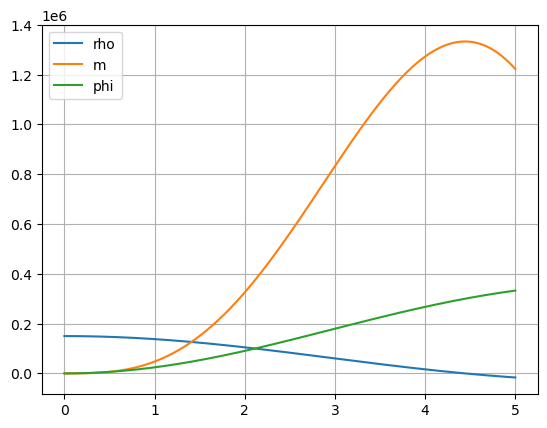

In [38]:
# plot
plt.plot(r, x[:,0], label='rho')
plt.plot(r, x[:,1], label='m')
plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.legend()
plt.grid()
plt.show()

In [36]:
(k*(x[:,0])**gamma).min()

2780.9698229446144